In [13]:


import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



<h1>algorithm</h1>

In [14]:
def pagerank(graph, alpha=.9):
    n = len(graph)

    # remove links to self
    graph[range(n), range(n)] = 0
    
    # ensure stochasticity
    graph[:, graph.sum(0) == 0] = 1
    graph /= graph.sum(0)
    
    # add random teleports
    graph = alpha * graph + (1 - alpha) / n * np.ones((n, n))

    # power iteration
    prev = np.zeros(n)
    rank = prev + 1 / n
    while (rank - prev) @ (rank - prev) > 1e-8:
        prev = rank
        rank = graph @ rank

    return rank

<h1>generate graph</h1>

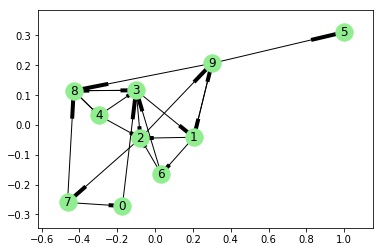

In [15]:
n = 10

graph = nx.DiGraph()
graph.add_nodes_from(range(n))
graph.add_edges_from(np.random.randint(0, n, (3 * n, 2)))

nx.draw_networkx(graph, node_color='lightgreen')


<h1>run</h1>

In [16]:
ranks = pagerank(
    np.array(nx.adjacency_matrix(graph).todense(), dtype=np.float32)
)

In [17]:
ranks.round(2)

array([ 0.04,  0.16,  0.14,  0.14,  0.1 ,  0.01,  0.07,  0.08,  0.13,  0.12])

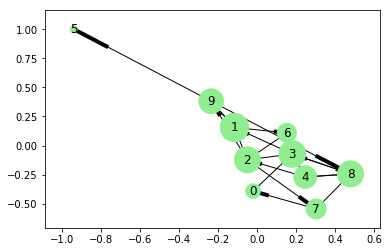

In [18]:
nx.draw_networkx(graph, node_color='lightgreen', node_size=ranks * 5000)